Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [3]:
!pip install numpy
!pip install keras
!pip install tensorflow
!pip install pandas
!pip install matplotlib

if you are using GoogleColab, please install the following packages and mount your Google drive:

In [4]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended  2> /dev/null  > /dev/null 
!apt-get install pandoc 2> /dev/null  > /dev/null 

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Run the following cell to load the packages you will need.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.set_index('id', inplace=True)

Now, let's split the data into training and test sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [8]:
# START YOUR CODE HERE
model = Sequential()
model.add(Dense(512, input_dim=512, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

Now, let's start our training.

In [9]:
	
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [10]:
history = model.fit(X_train, y_train,epochs=20, batch_size=64, verbose=0)


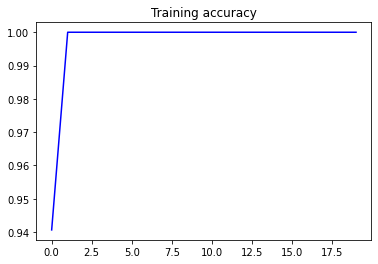

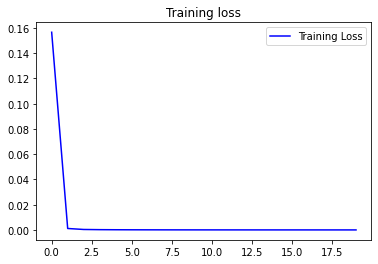

In [11]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set and report Precision, Recall, F1-Score, and Accuracy.

In [20]:
# START YOUR CODE HERE
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
predictions = model.predict(X_test)
predictions=np.where(predictions > 0.5, 1,0)


In [21]:
confusion_matrix(y_test, predictions)

array([[247,   0],
       [  0, 428]])

In [22]:
accuracy_score(y_test, predictions)

1.0

In [14]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       247\n           1       1.00      1.00      1.00       428\n\n    accuracy                           1.00       675\n   macro avg       1.00      1.00      1.00       675\nweighted avg       1.00      1.00      1.00       675\n'

Export your notebook to a pdf document

In [18]:
!jupyter nbconvert --to html '/content/drive/MyDrive/1_3C (1).ipynb'



[NbConvertApp] Converting notebook /content/drive/MyDrive/1_3C (1).ipynb to html
[NbConvertApp] Writing 324502 bytes to /content/drive/MyDrive/1_3C (1).html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

